In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.dataset_builders import Mnist
from src.simple_cnn import SimpleCNN

BATCH_SIZE = 10
EPOCHS = 3

data = Mnist()
IMG_SHAPE = data.IMG_SHAPE
NUM_CLASSES = data.NUM_CLASSES
x_train = data.x_train
x_test = data.x_test
y_train = data.y_train
y_test = data.y_test


/Users/i862304/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)

final shape (x_train): (60000, 28, 28, 1)
final shape (x_test): (10000, 28, 28, 1)
final shape (y_train): (60000, 10)
final shape (y_test): (10000, 10)



In [3]:
def evaluate_cnn(cnn):
    score = cnn.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print()
 
    for ii in range(5):
        truth = np.argmax(y_test[ii])
    #     pred = cnn.predict(x_test[ii:ii+1])
        arr_prob = cnn.predict_proba(x_test[ii:ii+1])
        prob = np.max(arr_prob)
        pred = np.argmax(arr_prob)
        ss = "truth: {}, pred: {}, proba: {}"
        print(ss.format(str(truth), str(pred), str(prob)))

## Experiments with layer dimensions

In [4]:
## 3 epochs - loss: 0.0664 - acc: 0.9798 (about 3 min per epoch)
# DIMS = [32, 64, 128] 
# M = SimpleCNN(IMG_SHAPE, NUM_CLASSES, dims=DIMS)
# cnn = M.cnn
# cnn.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

# DIMS = [32, 32, 64] # 
# M = SimpleCNN(IMG_SHAPE, NUM_CLASSES, dims=DIMS)
# cnn = M.cnn
# cnn.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

## 3 epochs - loss: 0.0955 - acc: 0.9716(about 1 min per epoch) 
## [how would it do if allowed to run for the same amount of time?]
DIMS = [16, 16, 128] 
M = SimpleCNN(IMG_SHAPE, NUM_CLASSES, dims=DIMS)
cnn = M.cnn
cnn.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/3
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1999 - acc: 0.9401
Epoch 2/3
60000/60000 [==============================] - 59s 988us/step - loss: 0.1068 - acc: 0.9683
Epoch 3/3
60000/60000 [==============================] - 59s 991us/step - loss: 0.0883 - acc: 0.9742


In [5]:
evaluate_cnn(cnn)

Test loss: 0.0435474529305473
Test accuracy: 0.9855

truth: 7, pred: 7, proba: 0.99999535
truth: 2, pred: 2, proba: 0.9999846
truth: 1, pred: 1, proba: 0.9994154
truth: 0, pred: 0, proba: 0.9999062
truth: 4, pred: 4, proba: 0.99960524


In [6]:
results = cnn.predict(x_test)

df = pd.DataFrame({"truth": np.argmax(y_test, axis=1),
                   "prediction": np.argmax(results, axis=1),
                   "score": np.amax(results, axis=1),                   
                  })
df.head()

,truth,prediction,score
0,7,7,0.999995
1,2,2,0.999985
2,1,1,0.999415
3,0,0,0.999906
4,4,4,0.999605


In [7]:
results.shape

(10000, 10)

In [6]:
df[(df["score"] < .6) & (df["score"] > .5)]

,truth,prediction,score
320,9,9,0.514209
495,8,8,0.566097
582,8,2,0.579738
613,2,2,0.597328
619,1,8,0.564831
659,2,2,0.510990
684,7,3,0.558800
939,2,2,0.542391
1112,4,4,0.584316
1260,7,7,0.539676


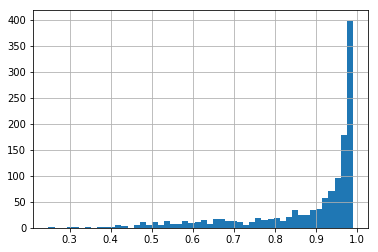

In [7]:
df[df["score"] < .99]["score"].hist(bins=50)

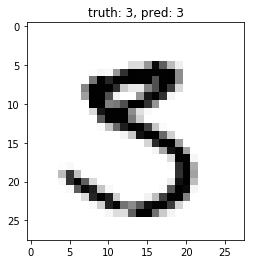

In [9]:
def foo(truth, pred, img):
    img = img.reshape(img.shape[:2])
    plt.title("truth: {}, pred: {}".format(truth, pred))
    plt.imshow(img, cmap='Greys')
    plt.show

def bar(ii):
    foo(df["truth"].iloc[ii], df["prediction"].loc[ii], x_test[ii])
              
ii = 938
bar(ii)